In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import sqlalchemy
import folium
import cartopy.crs as ccrs

In [2]:
pwd

'/Users/dam157/Downloads/Project_4'

In [4]:
%load_ext sql
from sqlalchemy import create_engine

In [4]:
#Create an egnine to be able to access the database

%sql postgresql://postgres:@localhost:5432/shootings

In [6]:
#Import the Data
shootings = pd.read_csv("/Users/dam157/Downloads/Project_4/shootings.csv", sep = ",")
shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,day,day_of_week
0,3,Tim Elliot,2015/01/02,shot,gun,53,M,A,Shelton,WA,...,attack,Not fleeing,False,-123.122,47.247,True,2015,1,2,Friday
1,4,Lewis Lee Lembke,2015/01/02,shot,gun,47,M,W,Aloha,OR,...,attack,Not fleeing,False,-122.892,45.487,True,2015,1,2,Friday
2,5,John Paul Quintero,2015/01/03,shot and Tasered,unarmed,23,M,H,Wichita,KS,...,other,Not fleeing,False,-97.281,37.695,True,2015,1,3,Saturday
3,8,Matthew Hoffman,2015/01/04,shot,toy weapon,32,M,W,San Francisco,CA,...,attack,Not fleeing,False,-122.422,37.763,True,2015,1,4,Sunday
4,9,Michael Rodriguez,2015/01/04,shot,nail gun,39,M,H,Evans,CO,...,attack,Not fleeing,False,-104.692,40.384,True,2015,1,4,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6827,8314,Zachary James Garrard,2022/08/07,shot,vehicle,31,M,unknown,Kansas City,MO,...,attack,Not fleeing,True,-94.555,39.037,True,2022,8,7,Sunday
6828,8327,Jordyn John Hansen,2022/08/07,shot,knife,21,M,unknown,Otsego,MN,...,other,Foot,False,-93.591,45.274,True,2022,8,7,Sunday
6829,8315,Javier Alanis,2022/08/08,shot,gun,31,M,unknown,Harris County,TX,...,attack,Other,False,-95.310,29.775,True,2022,8,8,Monday
6830,8326,William Chad Newman,2022/08/08,shot,gun,40,M,unknown,Lawrence County,AR,...,attack,Not fleeing,False,-91.073,36.084,True,2022,8,8,Monday


In [6]:
shootings.shape

(7662, 19)

In [31]:
gender = shootings.groupby( by = 'gender')['id'].count().reset_index()
gender

,gender,id
0,F,315
1,M,6517


In [7]:
shootings.nunique()

id                         7662
name                       7230
date                       2596
manner_of_death               2
armed                       103
age                          81
gender                        2
race                          6
city                       3139
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
longitude                  5985
latitude                   5288
is_geocoding_exact            2
                              0
 .1                           0
dtype: int64

In [8]:
#Check for missing values
shootings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7662 non-null   int64  
 1   name                     7263 non-null   object 
 2   date                     7662 non-null   object 
 3   manner_of_death          7662 non-null   object 
 4   armed                    7453 non-null   object 
 5   age                      7198 non-null   float64
 6   gender                   7644 non-null   object 
 7   race                     6238 non-null   object 
 8   city                     7662 non-null   object 
 9   state                    7662 non-null   object 
 10  signs_of_mental_illness  7662 non-null   bool   
 11  threat_level             7662 non-null   object 
 12  flee                     6809 non-null   object 
 13  body_camera              7662 non-null   bool   
 14  longitude               

In [9]:
shootings.describe()

,id,age,,.1
count,7662.000000,7198.000000,0.0,0.0
mean,4232.256983,37.154210,NaN,NaN
std,2392.923808,12.944269,NaN,NaN
min,3.000000,2.000000,NaN,NaN
25%,2148.250000,27.000000,NaN,NaN
50%,4256.500000,35.000000,NaN,NaN
75%,6306.750000,45.000000,NaN,NaN
max,8336.000000,92.000000,NaN,NaN


In [10]:
shootings.describe( include = "object")

,name,date,manner_of_death,armed,gender,race,city,state,threat_level,flee,longitude,latitude
count,7263,7662,7662,7453,7644,6238,7662,7662,7662,6809,6832,6832
unique,7230,2596,2,103,2,6,3139,51,3,4,5985,5288
top,Michael Johnson,2018-06-29,shot,gun,M,W,Los Angeles,CA,attack,Not fleeing,"-112,134","33,495"
freq,3,9,7323,4371,7300,3181,125,1108,4842,4305,6,11


In [11]:
shootings.isnull().sum()

id                            0
name                        399
date                          0
manner_of_death               0
armed                       209
age                         464
gender                       18
race                       1424
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        853
body_camera                   0
longitude                   830
latitude                    830
is_geocoding_exact            0
                           7662
 .1                        7662
dtype: int64

In [7]:
mean = shootings["age"].mean()
shootings["age"].fillna(mean , inplace = True)
shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,day,day_of_week
0,3,Tim Elliot,2015/01/02,shot,gun,53,M,A,Shelton,WA,...,attack,Not fleeing,False,-123.122,47.247,True,2015,1,2,Friday
1,4,Lewis Lee Lembke,2015/01/02,shot,gun,47,M,W,Aloha,OR,...,attack,Not fleeing,False,-122.892,45.487,True,2015,1,2,Friday
2,5,John Paul Quintero,2015/01/03,shot and Tasered,unarmed,23,M,H,Wichita,KS,...,other,Not fleeing,False,-97.281,37.695,True,2015,1,3,Saturday
3,8,Matthew Hoffman,2015/01/04,shot,toy weapon,32,M,W,San Francisco,CA,...,attack,Not fleeing,False,-122.422,37.763,True,2015,1,4,Sunday
4,9,Michael Rodriguez,2015/01/04,shot,nail gun,39,M,H,Evans,CO,...,attack,Not fleeing,False,-104.692,40.384,True,2015,1,4,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6827,8314,Zachary James Garrard,2022/08/07,shot,vehicle,31,M,unknown,Kansas City,MO,...,attack,Not fleeing,True,-94.555,39.037,True,2022,8,7,Sunday
6828,8327,Jordyn John Hansen,2022/08/07,shot,knife,21,M,unknown,Otsego,MN,...,other,Foot,False,-93.591,45.274,True,2022,8,7,Sunday
6829,8315,Javier Alanis,2022/08/08,shot,gun,31,M,unknown,Harris County,TX,...,attack,Other,False,-95.310,29.775,True,2022,8,8,Monday
6830,8326,William Chad Newman,2022/08/08,shot,gun,40,M,unknown,Lawrence County,AR,...,attack,Not fleeing,False,-91.073,36.084,True,2022,8,8,Monday


In [8]:
#replace the races with the actual races instead

# Mapping of abbreviations to full race names
race_mapping = {
    'A': 'Asian',
    'W': 'White',
    'H': 'Hispanic or Latino',
    'B': 'Black or African American',
    'O': 'Other',
    'N': 'Native American or Alaska Native'
}

# Replace the race abbreviations with the full names
shootings['race'] = shootings['race'].replace(race_mapping)

# Display the DataFrame
shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,day,day_of_week
0,3,Tim Elliot,2015/01/02,shot,gun,53,M,Asian,Shelton,WA,...,attack,Not fleeing,False,-123.122,47.247,True,2015,1,2,Friday
1,4,Lewis Lee Lembke,2015/01/02,shot,gun,47,M,White,Aloha,OR,...,attack,Not fleeing,False,-122.892,45.487,True,2015,1,2,Friday
2,5,John Paul Quintero,2015/01/03,shot and Tasered,unarmed,23,M,Hispanic or Latino,Wichita,KS,...,other,Not fleeing,False,-97.281,37.695,True,2015,1,3,Saturday
3,8,Matthew Hoffman,2015/01/04,shot,toy weapon,32,M,White,San Francisco,CA,...,attack,Not fleeing,False,-122.422,37.763,True,2015,1,4,Sunday
4,9,Michael Rodriguez,2015/01/04,shot,nail gun,39,M,Hispanic or Latino,Evans,CO,...,attack,Not fleeing,False,-104.692,40.384,True,2015,1,4,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6827,8314,Zachary James Garrard,2022/08/07,shot,vehicle,31,M,unknown,Kansas City,MO,...,attack,Not fleeing,True,-94.555,39.037,True,2022,8,7,Sunday
6828,8327,Jordyn John Hansen,2022/08/07,shot,knife,21,M,unknown,Otsego,MN,...,other,Foot,False,-93.591,45.274,True,2022,8,7,Sunday
6829,8315,Javier Alanis,2022/08/08,shot,gun,31,M,unknown,Harris County,TX,...,attack,Other,False,-95.310,29.775,True,2022,8,8,Monday
6830,8326,William Chad Newman,2022/08/08,shot,gun,40,M,unknown,Lawrence County,AR,...,attack,Not fleeing,False,-91.073,36.084,True,2022,8,8,Monday


In [14]:
shootings['race'].unique()

array(['Asian', 'White', 'Hispanic or Latino',
       'Black or African American', 'Other', nan,
       'Native American or Alaska Native'], dtype=object)

In [9]:
george = shootings[shootings['name'] == 'George Floyd']
george

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,day,day_of_week


In [15]:
mode = shootings["gender"].mode()
mode

0    M
Name: gender, dtype: object

In [10]:

shootings["gender"].fillna("M" , inplace = True)
shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,day,day_of_week
0,3,Tim Elliot,2015/01/02,shot,gun,53,M,Asian,Shelton,WA,...,attack,Not fleeing,False,-123.122,47.247,True,2015,1,2,Friday
1,4,Lewis Lee Lembke,2015/01/02,shot,gun,47,M,White,Aloha,OR,...,attack,Not fleeing,False,-122.892,45.487,True,2015,1,2,Friday
2,5,John Paul Quintero,2015/01/03,shot and Tasered,unarmed,23,M,Hispanic or Latino,Wichita,KS,...,other,Not fleeing,False,-97.281,37.695,True,2015,1,3,Saturday
3,8,Matthew Hoffman,2015/01/04,shot,toy weapon,32,M,White,San Francisco,CA,...,attack,Not fleeing,False,-122.422,37.763,True,2015,1,4,Sunday
4,9,Michael Rodriguez,2015/01/04,shot,nail gun,39,M,Hispanic or Latino,Evans,CO,...,attack,Not fleeing,False,-104.692,40.384,True,2015,1,4,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6827,8314,Zachary James Garrard,2022/08/07,shot,vehicle,31,M,unknown,Kansas City,MO,...,attack,Not fleeing,True,-94.555,39.037,True,2022,8,7,Sunday
6828,8327,Jordyn John Hansen,2022/08/07,shot,knife,21,M,unknown,Otsego,MN,...,other,Foot,False,-93.591,45.274,True,2022,8,7,Sunday
6829,8315,Javier Alanis,2022/08/08,shot,gun,31,M,unknown,Harris County,TX,...,attack,Other,False,-95.310,29.775,True,2022,8,8,Monday
6830,8326,William Chad Newman,2022/08/08,shot,gun,40,M,unknown,Lawrence County,AR,...,attack,Not fleeing,False,-91.073,36.084,True,2022,8,8,Monday


In [11]:
mode = shootings["armed"].mode()
mode

0    gun
Name: armed, dtype: object

In [12]:
shootings["armed"].fillna("gun" , inplace = True)
shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,day,day_of_week
0,3,Tim Elliot,2015/01/02,shot,gun,53,M,Asian,Shelton,WA,...,attack,Not fleeing,False,-123.122,47.247,True,2015,1,2,Friday
1,4,Lewis Lee Lembke,2015/01/02,shot,gun,47,M,White,Aloha,OR,...,attack,Not fleeing,False,-122.892,45.487,True,2015,1,2,Friday
2,5,John Paul Quintero,2015/01/03,shot and Tasered,unarmed,23,M,Hispanic or Latino,Wichita,KS,...,other,Not fleeing,False,-97.281,37.695,True,2015,1,3,Saturday
3,8,Matthew Hoffman,2015/01/04,shot,toy weapon,32,M,White,San Francisco,CA,...,attack,Not fleeing,False,-122.422,37.763,True,2015,1,4,Sunday
4,9,Michael Rodriguez,2015/01/04,shot,nail gun,39,M,Hispanic or Latino,Evans,CO,...,attack,Not fleeing,False,-104.692,40.384,True,2015,1,4,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6827,8314,Zachary James Garrard,2022/08/07,shot,vehicle,31,M,unknown,Kansas City,MO,...,attack,Not fleeing,True,-94.555,39.037,True,2022,8,7,Sunday
6828,8327,Jordyn John Hansen,2022/08/07,shot,knife,21,M,unknown,Otsego,MN,...,other,Foot,False,-93.591,45.274,True,2022,8,7,Sunday
6829,8315,Javier Alanis,2022/08/08,shot,gun,31,M,unknown,Harris County,TX,...,attack,Other,False,-95.310,29.775,True,2022,8,8,Monday
6830,8326,William Chad Newman,2022/08/08,shot,gun,40,M,unknown,Lawrence County,AR,...,attack,Not fleeing,False,-91.073,36.084,True,2022,8,8,Monday


In [13]:
mode = shootings["flee"].mode()
shootings["flee"].fillna("Not fleeing" , inplace = True)
shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,day,day_of_week
0,3,Tim Elliot,2015/01/02,shot,gun,53,M,Asian,Shelton,WA,...,attack,Not fleeing,False,-123.122,47.247,True,2015,1,2,Friday
1,4,Lewis Lee Lembke,2015/01/02,shot,gun,47,M,White,Aloha,OR,...,attack,Not fleeing,False,-122.892,45.487,True,2015,1,2,Friday
2,5,John Paul Quintero,2015/01/03,shot and Tasered,unarmed,23,M,Hispanic or Latino,Wichita,KS,...,other,Not fleeing,False,-97.281,37.695,True,2015,1,3,Saturday
3,8,Matthew Hoffman,2015/01/04,shot,toy weapon,32,M,White,San Francisco,CA,...,attack,Not fleeing,False,-122.422,37.763,True,2015,1,4,Sunday
4,9,Michael Rodriguez,2015/01/04,shot,nail gun,39,M,Hispanic or Latino,Evans,CO,...,attack,Not fleeing,False,-104.692,40.384,True,2015,1,4,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6827,8314,Zachary James Garrard,2022/08/07,shot,vehicle,31,M,unknown,Kansas City,MO,...,attack,Not fleeing,True,-94.555,39.037,True,2022,8,7,Sunday
6828,8327,Jordyn John Hansen,2022/08/07,shot,knife,21,M,unknown,Otsego,MN,...,other,Foot,False,-93.591,45.274,True,2022,8,7,Sunday
6829,8315,Javier Alanis,2022/08/08,shot,gun,31,M,unknown,Harris County,TX,...,attack,Other,False,-95.310,29.775,True,2022,8,8,Monday
6830,8326,William Chad Newman,2022/08/08,shot,gun,40,M,unknown,Lawrence County,AR,...,attack,Not fleeing,False,-91.073,36.084,True,2022,8,8,Monday


In [14]:
shootings["name"].fillna("Unknown" , inplace = True)
shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,day,day_of_week
0,3,Tim Elliot,2015/01/02,shot,gun,53,M,Asian,Shelton,WA,...,attack,Not fleeing,False,-123.122,47.247,True,2015,1,2,Friday
1,4,Lewis Lee Lembke,2015/01/02,shot,gun,47,M,White,Aloha,OR,...,attack,Not fleeing,False,-122.892,45.487,True,2015,1,2,Friday
2,5,John Paul Quintero,2015/01/03,shot and Tasered,unarmed,23,M,Hispanic or Latino,Wichita,KS,...,other,Not fleeing,False,-97.281,37.695,True,2015,1,3,Saturday
3,8,Matthew Hoffman,2015/01/04,shot,toy weapon,32,M,White,San Francisco,CA,...,attack,Not fleeing,False,-122.422,37.763,True,2015,1,4,Sunday
4,9,Michael Rodriguez,2015/01/04,shot,nail gun,39,M,Hispanic or Latino,Evans,CO,...,attack,Not fleeing,False,-104.692,40.384,True,2015,1,4,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6827,8314,Zachary James Garrard,2022/08/07,shot,vehicle,31,M,unknown,Kansas City,MO,...,attack,Not fleeing,True,-94.555,39.037,True,2022,8,7,Sunday
6828,8327,Jordyn John Hansen,2022/08/07,shot,knife,21,M,unknown,Otsego,MN,...,other,Foot,False,-93.591,45.274,True,2022,8,7,Sunday
6829,8315,Javier Alanis,2022/08/08,shot,gun,31,M,unknown,Harris County,TX,...,attack,Other,False,-95.310,29.775,True,2022,8,8,Monday
6830,8326,William Chad Newman,2022/08/08,shot,gun,40,M,unknown,Lawrence County,AR,...,attack,Not fleeing,False,-91.073,36.084,True,2022,8,8,Monday


In [21]:
shootings.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact',
       ' ', ' .1'],
      dtype='object')

In [15]:
shootings["race"].fillna("White", inplace = True)
shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,day,day_of_week
0,3,Tim Elliot,2015/01/02,shot,gun,53,M,Asian,Shelton,WA,...,attack,Not fleeing,False,-123.122,47.247,True,2015,1,2,Friday
1,4,Lewis Lee Lembke,2015/01/02,shot,gun,47,M,White,Aloha,OR,...,attack,Not fleeing,False,-122.892,45.487,True,2015,1,2,Friday
2,5,John Paul Quintero,2015/01/03,shot and Tasered,unarmed,23,M,Hispanic or Latino,Wichita,KS,...,other,Not fleeing,False,-97.281,37.695,True,2015,1,3,Saturday
3,8,Matthew Hoffman,2015/01/04,shot,toy weapon,32,M,White,San Francisco,CA,...,attack,Not fleeing,False,-122.422,37.763,True,2015,1,4,Sunday
4,9,Michael Rodriguez,2015/01/04,shot,nail gun,39,M,Hispanic or Latino,Evans,CO,...,attack,Not fleeing,False,-104.692,40.384,True,2015,1,4,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6827,8314,Zachary James Garrard,2022/08/07,shot,vehicle,31,M,unknown,Kansas City,MO,...,attack,Not fleeing,True,-94.555,39.037,True,2022,8,7,Sunday
6828,8327,Jordyn John Hansen,2022/08/07,shot,knife,21,M,unknown,Otsego,MN,...,other,Foot,False,-93.591,45.274,True,2022,8,7,Sunday
6829,8315,Javier Alanis,2022/08/08,shot,gun,31,M,unknown,Harris County,TX,...,attack,Other,False,-95.310,29.775,True,2022,8,8,Monday
6830,8326,William Chad Newman,2022/08/08,shot,gun,40,M,unknown,Lawrence County,AR,...,attack,Not fleeing,False,-91.073,36.084,True,2022,8,8,Monday


In [23]:
#shootings.drop([' .1',' '], inplace = True)

In [24]:
shootings.duplicated().sum()

0

In [16]:
shootings['date'] = pd.to_datetime( shootings['date'])

In [17]:
shootings['weekdays'] = shootings['date'].dt.day_name()
shootings['day'] = shootings['date'].dt.day
shootings['month'] = shootings['date'].dt.month_name()
shootings['year'] = shootings['date'].dt.year
shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,day,day_of_week,weekdays
0,3,Tim Elliot,2015-01-02,shot,gun,53,M,Asian,Shelton,WA,...,Not fleeing,False,-123.122,47.247,True,2015,January,2,Friday,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,White,Aloha,OR,...,Not fleeing,False,-122.892,45.487,True,2015,January,2,Friday,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,Hispanic or Latino,Wichita,KS,...,Not fleeing,False,-97.281,37.695,True,2015,January,3,Saturday,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,White,San Francisco,CA,...,Not fleeing,False,-122.422,37.763,True,2015,January,4,Sunday,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,Hispanic or Latino,Evans,CO,...,Not fleeing,False,-104.692,40.384,True,2015,January,4,Sunday,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6827,8314,Zachary James Garrard,2022-08-07,shot,vehicle,31,M,unknown,Kansas City,MO,...,Not fleeing,True,-94.555,39.037,True,2022,August,7,Sunday,Sunday
6828,8327,Jordyn John Hansen,2022-08-07,shot,knife,21,M,unknown,Otsego,MN,...,Foot,False,-93.591,45.274,True,2022,August,7,Sunday,Sunday
6829,8315,Javier Alanis,2022-08-08,shot,gun,31,M,unknown,Harris County,TX,...,Other,False,-95.310,29.775,True,2022,August,8,Monday,Monday
6830,8326,William Chad Newman,2022-08-08,shot,gun,40,M,unknown,Lawrence County,AR,...,Not fleeing,False,-91.073,36.084,True,2022,August,8,Monday,Monday


In [27]:
#float(shootings['latitude'])

In [28]:
#latitude_average = shootings.groupby( by = "state")['latitude'].mean
#latitude_average

In [18]:
#create a new category for the type of weapons used 

# Define weapon categories
dangerous_weapons = {'gun', 'vehicle', 'guns and explosives', 'crossbow', 'Taser', 'machete', 'sword', 'gun and knife', 
                     'ax', 'chainsaw', 'machete and gun', 'gun and car', 'incendiary device', 'samurai sword', 'bow and arrow', 
                     'gun and vehicle', 'vehicle and gun', 'gun and sword', 'vehicle and machete', 'knife and vehicle', 
                     'gun and machete', 'machete and hammer', 'incendiary weapon', 'ax and machete', 'hatchet and gun'}

moderate_weapons = {'knife', 'nail gun', 'hammer', 'hatchet', 'box cutter', 'metal object', 'screwdriver', 'lawn mower blade', 
                    'flagpole', 'cordless drill', 'metal pole', 'metal pipe', 'metal hand tool', 'blunt object', 'metal stick', 
                    'sharp object', 'meat cleaver', 'carjack', 'chain', 'contractor\'s level', 'railroad spikes', 'stapler', 
                    'beer bottle', 'pellet gun', 'baseball bat and fireplace poker', 'straight edge razor', 'brick', 
                    'baseball bat', 'hand torch', 'garden tool', 'pair of scissors', 'pole', 'pick-axe', 'flashlight', 
                    'baton', 'spear', 'chair', 'pitchfork', 'rock', 'piece of wood', 'pipe', 'glass shard', 'motorcycle', 
                    'pepper spray', 'metal rake', 'crowbar', 'oar', 'tire iron', 'air conditioner', 'pole and knife', 
                    'baseball bat and bottle', 'pen', 'wrench', 'walking stick', 'barstool', 'ice pick', 'bottle', 'stake', 
                    'hammer and garden tool'}

minor_weapons = {'toy weapon', 'unarmed', 'undetermined', 'BB gun', 'binoculars', 'bean-bag gun', 'unknown weapon', 
                 'fireworks', 'air pistol', 'Airsoft pistol', 'wasp spray', 'BB gun and vehicle', 'claimed to be armed', 
                 'microphone'}

# Function to categorize weapons
def categorize_weapon(weapon):
    if weapon == 'unarmed':
        return 'unarmed'
    elif weapon in dangerous_weapons:
        return 'dangerous weapon'
    elif weapon in moderate_weapons:
        return 'moderate weapon'
    elif weapon in minor_weapons:
        return 'minor weapon'
    else:
        return 'undetermined'

# Create the new column
shootings['weapon_level'] = shootings['armed'].apply(categorize_weapon)

# Display the DataFrame
shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,body_camera,longitude,latitude,is_geocoding_exact,year,month,day,day_of_week,weekdays,weapon_level
0,3,Tim Elliot,2015-01-02,shot,gun,53,M,Asian,Shelton,WA,...,False,-123.122,47.247,True,2015,January,2,Friday,Friday,dangerous weapon
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,White,Aloha,OR,...,False,-122.892,45.487,True,2015,January,2,Friday,Friday,dangerous weapon
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,Hispanic or Latino,Wichita,KS,...,False,-97.281,37.695,True,2015,January,3,Saturday,Saturday,unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,White,San Francisco,CA,...,False,-122.422,37.763,True,2015,January,4,Sunday,Sunday,minor weapon
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,Hispanic or Latino,Evans,CO,...,False,-104.692,40.384,True,2015,January,4,Sunday,Sunday,moderate weapon


In [19]:
shootings.to_csv('shootings.csv', index = False, encoding='utf-8') # False: not include index
print(shootings)

        id                   name       date   manner_of_death       armed  \
0        3             Tim Elliot 2015-01-02              shot         gun   
1        4       Lewis Lee Lembke 2015-01-02              shot         gun   
2        5     John Paul Quintero 2015-01-03  shot and Tasered     unarmed   
3        8        Matthew Hoffman 2015-01-04              shot  toy weapon   
4        9      Michael Rodriguez 2015-01-04              shot    nail gun   
...    ...                    ...        ...               ...         ...   
6827  8314  Zachary James Garrard 2022-08-07              shot     vehicle   
6828  8327     Jordyn John Hansen 2022-08-07              shot       knife   
6829  8315          Javier Alanis 2022-08-08              shot         gun   
6830  8326    William Chad Newman 2022-08-08              shot         gun   
6831  8324               PicknPay 2022-08-09              shot         gun   

      age gender                race             city state  ..

In [30]:
shootings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       7662 non-null   int64         
 1   name                     7662 non-null   object        
 2   date                     7662 non-null   datetime64[ns]
 3   manner_of_death          7662 non-null   object        
 4   armed                    7662 non-null   object        
 5   age                      7662 non-null   float64       
 6   gender                   7662 non-null   object        
 7   race                     7662 non-null   object        
 8   city                     7662 non-null   object        
 9   state                    7662 non-null   object        
 10  signs_of_mental_illness  7662 non-null   bool          
 11  threat_level             7662 non-null   object        
 12  flee                     7662 non-

Choosing the target variable

Aim : To investigate wrongful shootings or panic shootings, the cause and where it most occur.

US DEPARTMENT OJ JUSTICE : ON USE OF DEADLY FORCE

1-16.200 - DEADLY FORCE
1. Law enforcement officers and correctional officers of the Department of Justice may use deadly force only when necessary, that is, when the officer has a reasonable belief that the subject of such force poses an imminent danger of death or serious physical injury to the officer or to another person.
a. Deadly force may not be used solely to prevent the escape of a fleeing suspect.

b. Firearms may not be discharged solely to disable moving vehicles. Specifically, firearms may not be discharged at a moving vehicle unless: (1) a person in the vehicle is threatening the officer or another person with deadly force by means other than the vehicle; or (2) the vehicle is operated in a manner that threatens to cause death or serious physical injury to the officer or others, and no other objectively reasonable means of defense appear to exist, which includes moving out of the path of the vehicle. Firearms may not be discharged from a moving vehicle except in exigent circumstances. In these situations, an officer must have an articulable reason for this use of deadly force.
c. If feasible and if to do so would not increase the danger to the officer or others, a verbal warning to submit to the authority of the officer shall be given prior to the use of deadly force.

d. Warning shots are not permitted outside of the prison context.

e. Officers will be trained in alternative methods and tactics for handling resisting subjects, which must be used when the use of deadly force is not authorized by this policy.

f. Deadly force should not be used against persons whose actions are a threat solely to themselves or property unless an individual poses an imminent danger of death or serious physical injury to the officer or others in close proximity.

Source: https://www.justice.gov/jm/1-16000-department-justice-policy-use-force#1-16.200

EXPLORATORY DATA ANALYSIS

UNIVARIATE ANALYSIS

In [31]:
year = shootings.groupby( by = "year")["id"].count().reset_index()
year

,year,id
0,2015,994
1,2016,958
2,2017,981
3,2018,993
4,2019,999
5,2020,1020
6,2021,1055
7,2022,662


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Number of death')

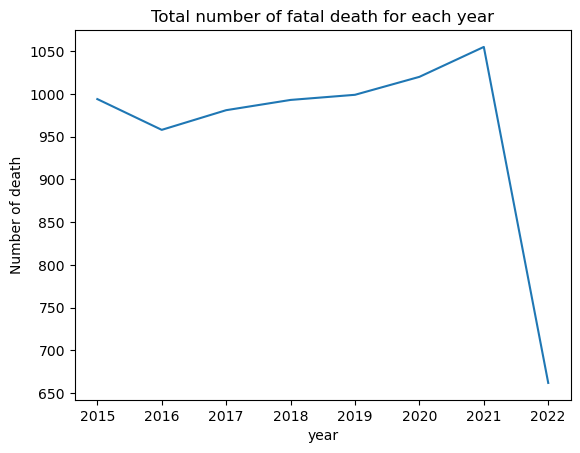

In [33]:
#Distribution of fatal police killings over time(In years)
sns.lineplot(x = "year", y = "id", data = year)
plt.title("Total number of fatal death for each year")
plt.ylabel("Number of death")

Most fatal death happened in 2021 which experienced 1050 fatal death caused by police shooting

In [ ]:
month = shootings.groupby( by = "month")["id"].count().reset_index()
month

,month,id
0,April,649
1,August,633
2,December,595
3,February,678
4,January,680
5,July,674
6,June,686
7,March,737
8,May,662
9,November,554


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


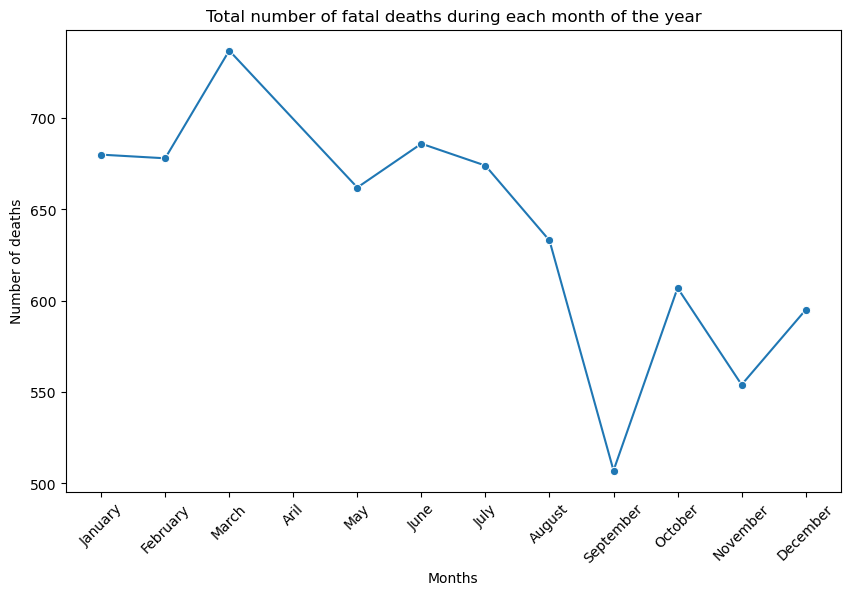

In [ ]:
#Define the order of the days of the week
month_order = ['January', 'February', 'March','Aril', 'May', 'June', 'July', 'August','September','October','November','December']

#Assuming 'purch_df' is your DataFrame
#Reorder the categories in the DataFrame
month['month'] = pd.Categorical(month['month'],categories= month_order, ordered=True)


#Plotting the data
plt.figure(figsize=(10, 6))
sns.lineplot(x="month", y="id", data=month , marker='o')
plt.title("Total number of fatal deaths during each month of the year")
plt.xlabel("Months")
plt.ylabel("Number of deaths")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate average killings for weekday and weekend
total_killing_by_day = shootings.groupby('weekdays')['id'].count().reset_index()
total_killing_by_day.sort_values(by = 'id', ascending = False, inplace = True)
total_killing_by_day

,weekdays,id
6,Wednesday,1169
5,Tuesday,1152
4,Thursday,1139
0,Friday,1090
3,Sunday,1051
1,Monday,1035
2,Saturday,1026


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


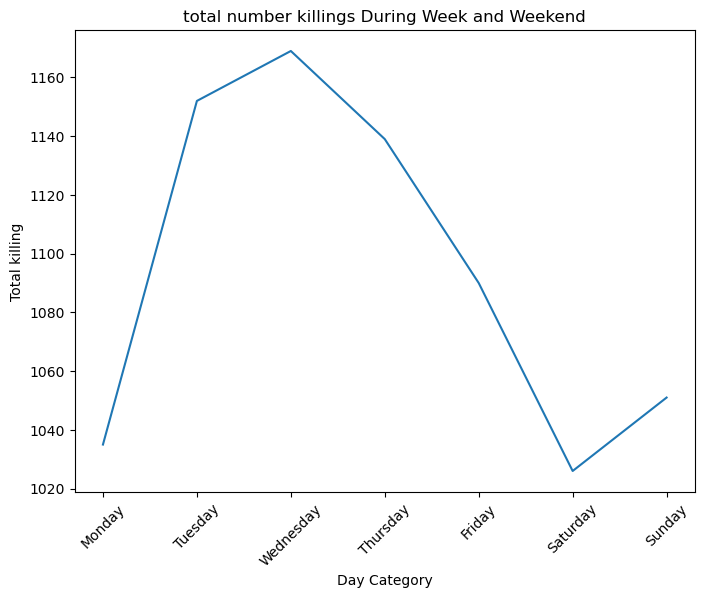

In [ ]:
#Define the order of the days of the week
month_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

#Assuming 'purch_df' is your DataFrame
#Reorder the categories in the DataFrame
total_killing_by_day['weekdays'] = pd.Categorical(total_killing_by_day['weekdays'],categories= month_order, ordered=True)



# Plotting the results
plt.figure(figsize=(8, 6))
sns.lineplot( x = 'weekdays', y = 'id', data = total_killing_by_day)
plt.title('total number killings During Week and Weekend')
plt.xlabel('Day Category')
plt.ylabel('Total killing')
plt.xticks(rotation = 45)
plt.show()

March experience more fatal death than any other month during the year, followed by January and then February.  September experienced way less fatal shootings

In [ ]:
#Fatal death caused by shooting
unarmed = shootings[shootings['armed'] == 'unarmed']
unarmed

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,body_camera,longitude,latitude,is_geocoding_exact,,.1,weekdays,day,month,year
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.00000,M,Hispanic or Latino,Wichita,KS,...,False,"-97,281","37,695",True,NaN,NaN,Saturday,3,January,2015
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.00000,F,White,Burlington,IA,...,True,"-91,119","40,809",True,NaN,NaN,Tuesday,6,January,2015
17,36,Artago Damon Howard,2015-01-08,shot,unarmed,36.00000,M,Black or African American,Strong,AR,...,False,"-92,359","33,111",True,NaN,NaN,Thursday,8,January,2015
62,352,Joshua Omar Garcia,2015-01-26,shot,unarmed,24.00000,M,Hispanic or Latino,Tahoka,TX,...,False,"-101,666","33,166",True,NaN,NaN,Monday,26,January,2015
72,342,Ralph Willis,2015-01-29,shot,unarmed,42.00000,M,White,Stillwater,OK,...,False,"-97,05","36,121",True,NaN,NaN,Thursday,29,January,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,8146,Joseph Maverick Nagle,2022-06-16,shot,unarmed,22.00000,M,White,Monterey Township,MI,...,False,"-85,83","42,675",True,NaN,NaN,Thursday,16,June,2022
7507,8166,Unknown,2022-06-21,shot,unarmed,37.15421,M,White,Adelanto,CA,...,False,"-117,399","34,536",True,NaN,NaN,Tuesday,21,June,2022
7525,8185,Jayland Walker,2022-06-27,shot,unarmed,25.00000,M,Black or African American,Akron,OH,...,True,NaN,NaN,True,NaN,NaN,Monday,27,June,2022
7558,8215,Shane Netterville,2022-07-08,shot,unarmed,28.00000,M,Native American or Alaska Native,Fargo,ND,...,False,NaN,NaN,True,NaN,NaN,Friday,8,July,2022


In [ ]:
unarmed.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact',
       ' ', ' .1', 'weekdays', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
unarm = unarmed.groupby( by = 'month')['id'].count().reset_index()
unarm

,month,id
0,April,38
1,August,31
2,December,30
3,February,51
4,January,46
5,July,32
6,June,40
7,March,54
8,May,36
9,November,31


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

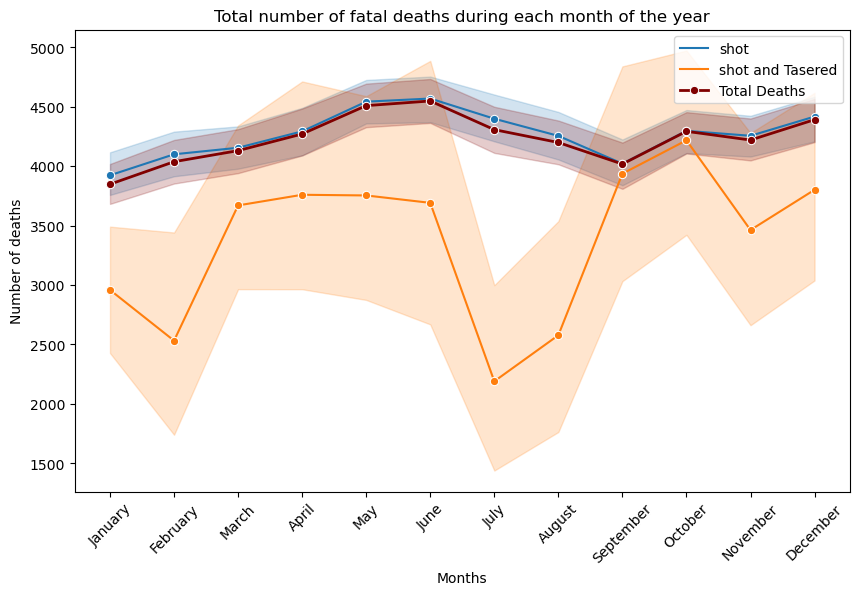

In [ ]:
#Define the order of the days of the week
month_order = ['January', 'February', 'March','Aril', 'May', 'June', 'July', 'August','September','October','November','December']

#Assuming 'purch_df' is your DataFrame
#Reorder the categories in the DataFrame
unarm['month'] = pd.Categorical(unarm['month'],categories= month_order, ordered=True)

# Plot total deaths

#Plotting the data
plt.figure(figsize=(10, 6))
sns.lineplot(x="month", y="id", data= shootings, hue = 'manner_of_death' , marker='o')
sns.lineplot(x="month", y="id", data= shootings, marker='o', label='Total Deaths', color='maroon', linewidth=2)
plt.title("Total number of fatal deaths during each month of the year")
plt.xlabel("Months")
plt.ylabel("Number of deaths")
plt.xticks(rotation=45)
plt.show()

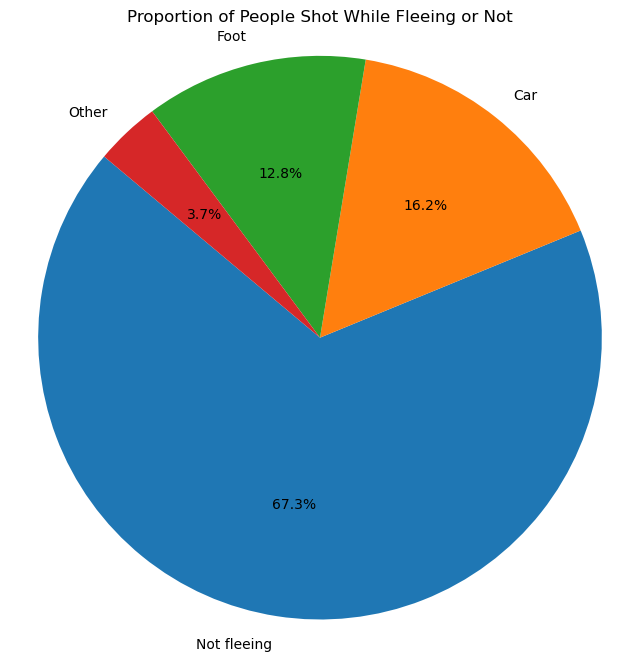

In [65]:
# Assuming shootings is your DataFrame
# Group by the 'flee' column and count the occurrences
flee_counts = shootings['flee'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(flee_counts, labels=flee_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of People Shot While Fleeing or Not')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
unarmed["threat_level"].value_counts().reset_index()

,threat_level,count
0,other,231
1,attack,176
2,undetermined,47


On people who were unarmed, most of them, their threat level was not yet identified before shooting 

In [ ]:
unarmed["signs_of_mental_illness"].value_counts().reset_index()

,signs_of_mental_illness,count
0,False,368
1,True,86


In [ ]:
unarmed["age"].mean()

32.660628319418144

In [ ]:
unarmed['body_camera'].value_counts().reset_index()

,body_camera,count
0,False,359
1,True,95


on 454 unarmed shootings that happened, there are 359 cases that were not caught on a body camera and this represents atleast 75% of people who were shot while they were unarmed

Bivariate analysis

In [ ]:
gender = unarmed.groupby( by = 'gender')['id'].count().reset_index()
gender

,gender,id
0,F,34
1,M,420


In [ ]:
race = unarmed.groupby(by = 'race' )['id'].count().reset_index()
race.sort_values( by = 'id', ascending = False, inplace = True)
race

,race,id
5,White,208
1,Black or African American,143
2,Hispanic or Latino,83
0,Asian,8
3,Native American or Alaska Native,7
4,Other,5


For people who were unarmed, there are 420 Males and 34 females

In [ ]:
# #Plotting the data
# plt.figure(figsize=(10, 6))
# sns.barplot( x= "state", y="id", data= shootings )
# plt.title("Number of deaths happening by State")
# plt.xlabel("State")
# plt.ylabel("Number of deaths")
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
state = shootings.groupby( by = 'state')['id'].count().reset_index()
state.sort_values( by = 'id', ascending = False)

,state,id
4,CA,1108
43,TX,687
9,FL,490
3,AZ,348
10,GA,289
5,CO,278
27,NC,217
35,OH,216
36,OK,211
42,TN,208


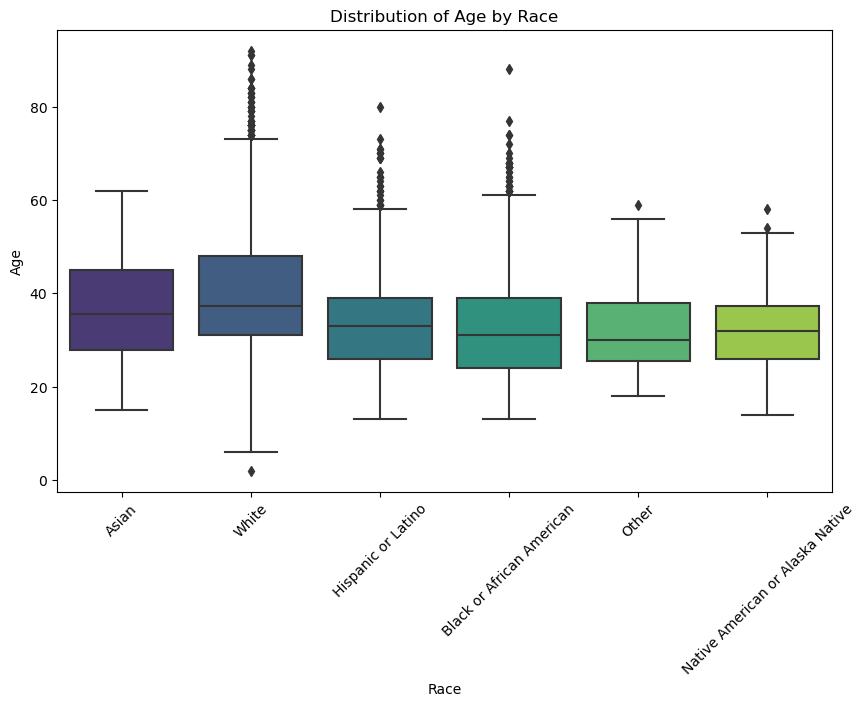

In [ ]:
# Calculate the average age for each race
race_age = shootings.groupby('race')['age'].mean().reset_index()
race_age.sort_values( by = 'age', ascending = False, inplace = True)

#  Plotting the data
plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='age', data=shootings, palette='viridis')
plt.title("Distribution of Age by Race")
plt.xlabel("Race")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Filter only the white people
white_people = shootings[shootings['race'] == 'White']

# Filter those who were unarmed or had a minor weapon among the white people
no_weapon = white_people[white_people['weapon_level'].isin(['unarmed', 'minor weapon'])]

# Display the filtered DataFrame
wrongfully_killed = no_weapon[no_weapon['threat_level'] == 'undetermined']

wrongfully_killed


,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,longitude,latitude,is_geocoding_exact,,.1,weekdays,day,month,year,weapon_level
693,822,Derick Davis,2015-09-12,shot,undetermined,23.00000,M,White,Sylacauga,AL,...,"-86,26","33,178",True,NaN,NaN,Saturday,12,September,2015,minor weapon
709,844,Gregory Herrell,2015-09-18,shot,undetermined,47.00000,M,White,Dickson,TN,...,"-87,388","36,077",True,NaN,NaN,Friday,18,September,2015,minor weapon
732,866,William Lemmon,2015-09-25,shot,unarmed,21.00000,M,White,Akron,OH,...,"-81,509","41,099",True,NaN,NaN,Friday,25,September,2015,unarmed
747,892,Matthew Dobbins,2015-10-02,shot,unarmed,29.00000,M,White,Amarillo,TX,...,"-101,883","35,057",True,NaN,NaN,Friday,2,October,2015,unarmed
844,992,Kim Lee Long,2015-11-06,shot,undetermined,48.00000,M,White,Wadesboro,NC,...,"-80,04","34,981",True,NaN,NaN,Friday,6,November,2015,minor weapon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,8267,William Whitfield,2022-07-24,shot,undetermined,42.00000,M,White,Benton,AR,...,"-92,566","34,542",True,NaN,NaN,Sunday,24,July,2022,minor weapon
7611,8278,Matthew Neal Mitchell,2022-07-24,shot,undetermined,22.00000,M,White,Englewood,CO,...,NaN,NaN,True,NaN,NaN,Sunday,24,July,2022,minor weapon
7612,8265,Daniel R. Strange,2022-07-25,shot,undetermined,51.00000,M,White,Waterloo,SC,...,NaN,NaN,True,NaN,NaN,Monday,25,July,2022,minor weapon
7619,8287,Kyle Dail,2022-07-27,shot,unarmed,30.00000,M,White,Dallas,TX,...,"-96,683","32,872",True,NaN,NaN,Wednesday,27,July,2022,unarmed


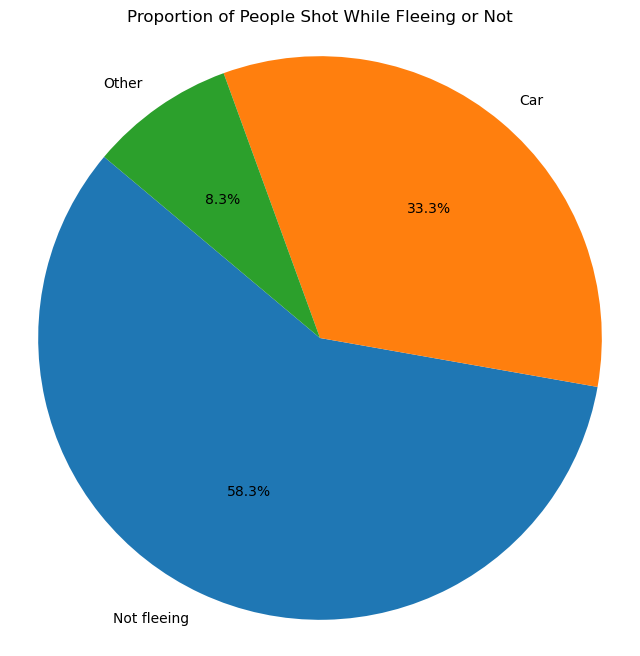

In [64]:
# Assuming shootings is your DataFrame
# Group by the 'flee' column and count the occurrences
flee_counts = wrongfully_killed['flee'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(flee_counts, labels=flee_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of People Shot While Fleeing or Not')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
wrongfully_killed['threat_level'].unique()

array(['undetermined'], dtype=object)

In [ ]:
# Calculate average killings for weekday and weekend
average_killing_by_day = shootings.groupby('weekdays')['id'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(8, 6))
average_killing_by_day.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Killings During Week and Weekend')
plt.xlabel('Day Category')
plt.ylabel('Average Killings')
plt.xticks(rotation=0)
plt.show()

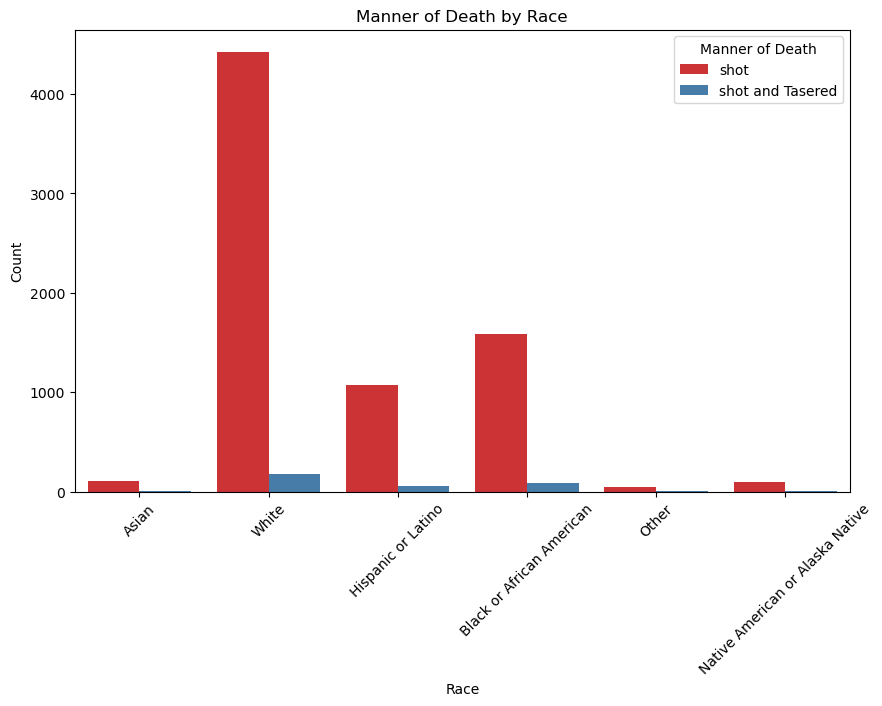

In [ ]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='manner_of_death', data=shootings, palette='Set1')
plt.title("Manner of Death by Race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Manner of Death')
plt.show()

In [34]:
#low_threat['race'].unique()

NameError: name 'low_threat' is not defined

In [35]:
#Filter those who are from most perfoming states( CA AND TX and check the AGE and Race)

top_states = shootings[shootings['state'].isin(['CA','TX', 'FL', 'AZ','GA'])]
top_states

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,longitude,latitude,is_geocoding_exact,,.1,weekdays,day,month,year,weapon_level
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.00000,M,White,San Francisco,CA,...,"-122,422","37,763",True,NaN,NaN,Sunday,4,January,2015,minor weapon
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.00000,M,Hispanic or Latino,Chandler,AZ,...,"-111,841","33,328",True,NaN,NaN,Monday,5,January,2015,dangerous weapon
10,19,Patrick Wetter,2015-01-06,shot and Tasered,knife,25.00000,M,White,Stockton,CA,...,"-121,299","37,93",True,NaN,NaN,Tuesday,6,January,2015,moderate weapon
11,21,Ron Sneed,2015-01-07,shot,gun,31.00000,M,Black or African American,Freeport,TX,...,"-95,369","28,955",True,NaN,NaN,Wednesday,7,January,2015,dangerous weapon
20,325,Andy Martinez,2015-01-09,shot,gun,33.00000,M,Hispanic or Latino,El Paso,TX,...,"-106,439","31,858",True,NaN,NaN,Friday,9,January,2015,dangerous weapon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,8318,Bryan Richardson,2022-08-06,shot,gun,28.00000,M,White,Orlando,FL,...,"-81,402","28,452",True,NaN,NaN,Saturday,6,August,2022,dangerous weapon
7650,8315,Javier Alanis,2022-08-08,shot,gun,37.15421,M,White,Harris County,TX,...,"-95,31","29,775",True,NaN,NaN,Monday,8,August,2022,dangerous weapon
7653,8329,Lane Morgan Caviness,2022-08-10,shot,gun,48.00000,M,White,Key Largo,FL,...,NaN,NaN,True,NaN,NaN,Wednesday,10,August,2022,dangerous weapon
7658,8335,Byron Hayes,2022-08-11,shot,gun,33.00000,M,White,Victorville,CA,...,NaN,NaN,True,NaN,NaN,Thursday,11,August,2022,dangerous weapon


In [ ]:
shootings['race'].unique()

array(['Asian', 'White', 'Hispanic or Latino',
       'Black or African American', 'Other',
       'Native American or Alaska Native'], dtype=object)

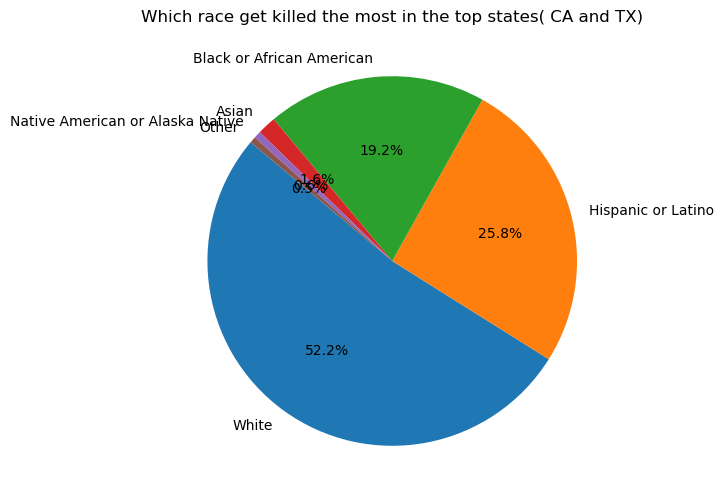

In [41]:
race_top_states = top_states.groupby( by = 'race')['id'].count().reset_index()
race_top_states.sort_values(by = "id", ascending = False, inplace = True)
#Plotting the data
plt.figure(figsize=(10, 6))
plt.pie(race_top_states['id'], labels=race_top_states['race'], autopct='%1.1f%%', startangle=140)
plt.title("Which race get killed the most in the top states( CA and TX)")
plt.xticks(rotation=90)
plt.show()



In [52]:
# Filter data for CA and TX
ca_tx_data = shootings[shootings['state'].isin(['CA', 'TX'])]

# Group by city and count fatal killings
city_counts = ca_tx_data.groupby(['city',]).size().reset_index(name='counts')
city_counts

,city,counts
0,Abilene,3
1,Addison,1
2,Adelanto,2
3,Aguanga,1
4,Alhambra,1
...,...,...
611,Wylie,1
612,Yorba Linda,1
613,Yreka,2
614,Yuba City,2


In [51]:

# Assuming you have a map centered at the US
# You can adjust the coordinates and zoom level accordingly
mymap = folium.Map(location=[37.7749, -122.4194], zoom_start=5)


In [53]:
# Filter data for states CA and FX
filtered_data = shootings[(shootings['state'] == 'CA') | (shootings['state'] == 'FX')]


NameError: name 'cartopy' is not defined

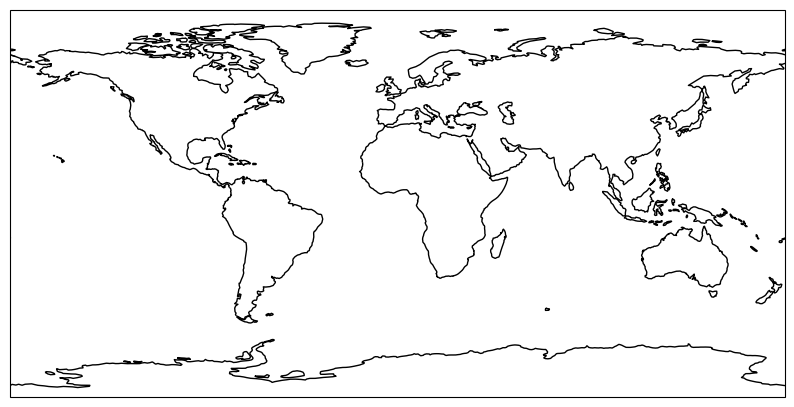

In [59]:
# Set up the map projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Draw map elements
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, edgecolor='black')

# Plot latitude and longitude points
ax.scatter(filtered_data['longitude'], filtered_data['latitude'], color='red', marker='o', alpha=0.5, transform=ccrs.PlateCarree())

# Add title and show the plot
plt.title('Fatal Killings in CA and FX')
plt.show()

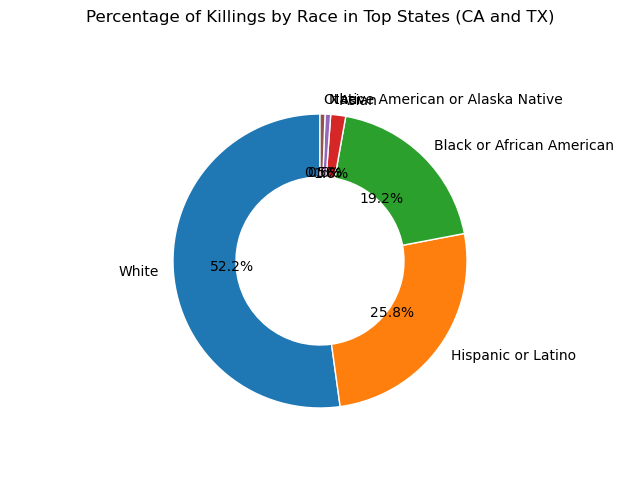

In [42]:
# Create two pie charts for the donut plot
fig, ax = plt.subplots(figsize=(8, 6))
size = 0.3

# Outer pie chart (white circle)
ax.pie([1], radius=1, colors=['w'], startangle=90, wedgeprops=dict(width=size, edgecolor='w'))

# Inner pie chart (actual data)
wedges, texts, autotexts = ax.pie(race_top_states['id'], radius=1-size, labels=race_top_states['race'], 
                                   autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=size, edgecolor='w'))

# Set aspect ratio to be equal
ax.axis('equal')

# Add a title
plt.title("Percentage of Killings by Race in Top States (CA and TX)")

# Display the plot
plt.show()

In [37]:
# Filter those who were unarmed or had a minor weapon among the white people
no_weapon = top_states[top_states['weapon_level'].isin(['unarmed', 'minor weapon'])]

# Display the filtered DataFrame
low_threat = no_weapon[no_weapon['threat_level'] == 'undetermined']

#Filter is body camera was present or not
wrongfully_killed = low_threat[low_threat['body_camera']]

wrongfully_killed

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,longitude,latitude,is_geocoding_exact,,.1,weekdays,day,month,year,weapon_level
1097,1251,Gustavo Najera,2016-02-09,shot,unarmed,22.00000,M,Hispanic or Latino,Anaheim,CA,...,"-117,934","33,843",True,NaN,NaN,Tuesday,9,February,2016,unarmed
1460,1647,Deravis Caine Rogers,2016-06-22,shot,unarmed,22.00000,M,Black or African American,Atlanta,GA,...,"-84,37","33,811",True,NaN,NaN,Wednesday,22,June,2016,unarmed
2279,2538,Jordan Edwards,2017-04-29,shot,unarmed,15.00000,M,Black or African American,Balch Springs,TX,...,"-96,615","32,712",True,NaN,NaN,Saturday,29,April,2017,unarmed
5244,5751,Michael Ramos,2020-04-24,shot,unarmed,42.00000,M,Hispanic or Latino,Austin,TX,...,"-97,73","30,223",True,NaN,NaN,Friday,24,April,2020,unarmed
5455,5969,James Porter Garcia,2020-07-04,shot,undetermined,28.00000,M,Hispanic or Latino,Phoenix,AZ,...,"-112,208","33,495",True,NaN,NaN,Saturday,4,July,2020,minor weapon
5936,6471,Trevor Seever,2020-12-29,shot,unarmed,29.00000,M,White,Modesto,CA,...,"-121,04","37,653",True,NaN,NaN,Tuesday,29,December,2020,unarmed
6262,6787,Sammie Joe Barbosa,2021-04-16,shot,undetermined,33.00000,M,White,San Antonio,TX,...,"-98,624","29,407",True,NaN,NaN,Friday,16,April,2021,minor weapon
6577,7081,Che Noe Zuniga,2021-08-07,shot,unarmed,21.00000,M,White,Bakersfield,CA,...,"-119,057","35,303",True,NaN,NaN,Saturday,7,August,2021,unarmed
6595,7098,Unknown,2021-08-13,shot,undetermined,37.15421,M,White,Bakersfield,CA,...,"-119,035","35,353",True,NaN,NaN,Friday,13,August,2021,minor weapon
7402,8077,Rafael Mendoza,2022-05-19,shot,unarmed,49.00000,M,White,San Francisco,CA,...,"-122,393","37,764",True,NaN,NaN,Thursday,19,May,2022,unarmed


there are 12 people who were killed when they were unarmed, there was no body camera and the threat level was undetermined before they were shot.

In [ ]:
low_threat = top_states[ top_states['race'] == 'White']

In [ ]:
weapon = shootings.groupby(by = 'weapon_level')['id'].count().reset_index()
weapon.sort_values( by = 'id', ascending= False, inplace= True)

#Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot( x= "weapon_level", y="id", data= weapon )
plt.title("Level of threat posed")
plt.xlabel("Level of threat by weapon")
plt.ylabel("Number of death")
plt.xticks(rotation=45)
plt.show()

In [ ]:
race_top_states = top_states.groupby( by = 'race')['id'].count().reset_index()
race_top_states.sort_values(by = "id", ascending = False, inplace = True)
race_top_states

,race,id
5,White,1525
2,Hispanic or Latino,754
1,Black or African American,561
0,Asian,48
3,Native American or Alaska Native,18
4,Other,16


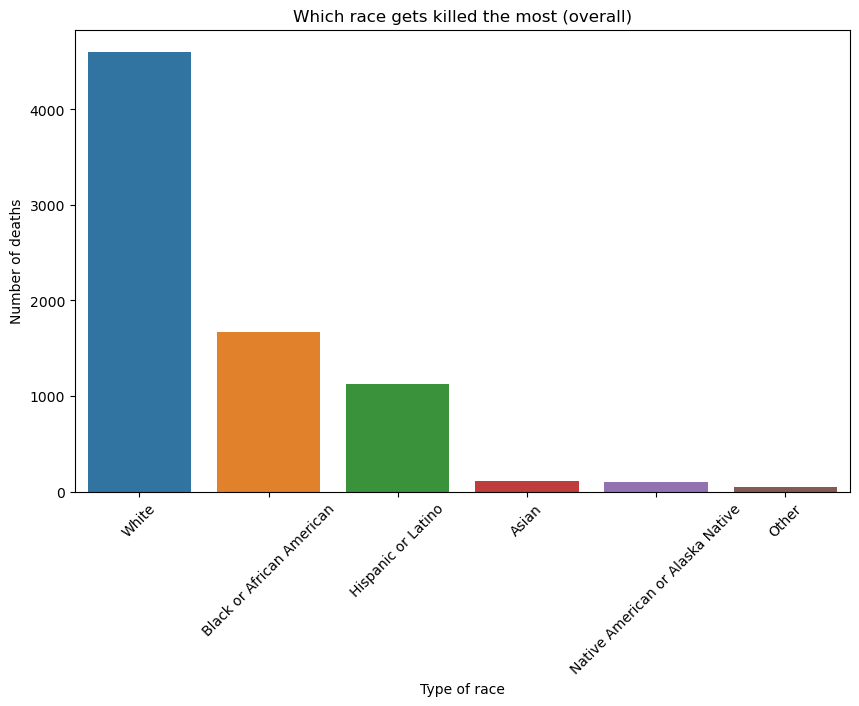

In [ ]:
# Aggregate the data by race and sort by the count of occurrences
race_counts = shootings['race'].value_counts().reset_index()
race_counts.columns = ['race', 'count']
race_counts = race_counts.sort_values(by='count', ascending=False)

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='race', y='count', data=race_counts)
plt.title("Which race gets killed the most (overall)")
plt.xlabel("Type of race")
plt.ylabel("Number of deaths")
plt.xticks(rotation=45)
plt.show()

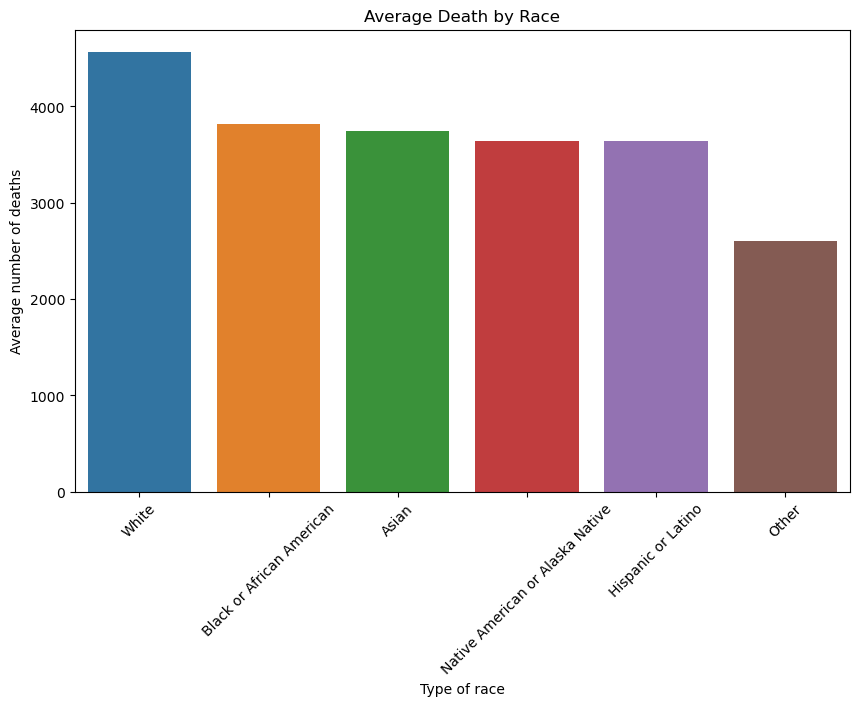

In [ ]:
race_counts = shootings.groupby( by = 'race')['id'].mean().reset_index()
race_counts.sort_values(by = 'id', ascending = False, inplace = True)


# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='race', y='id', data=race_counts)
plt.title("Average Death by Race")
plt.xlabel("Type of race")
plt.ylabel("Average number of deaths")
plt.xticks(rotation=45)
plt.show()

From

In [ ]:
shootings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       7662 non-null   int64         
 1   name                     7662 non-null   object        
 2   date                     7662 non-null   datetime64[ns]
 3   manner_of_death          7662 non-null   object        
 4   armed                    7662 non-null   object        
 5   age                      7662 non-null   float64       
 6   gender                   7662 non-null   object        
 7   race                     7662 non-null   object        
 8   city                     7662 non-null   object        
 9   state                    7662 non-null   object        
 10  signs_of_mental_illness  7662 non-null   bool          
 11  threat_level             7662 non-null   object        
 12  flee                     7662 non-

In [ ]:
state = unarmed.groupby(by = 'state')["id"].count().reset_index()
state.sort_values( by = 'id', ascending = False)

,state,id
4,CA,84
40,TX,48
8,FL,32
3,AZ,24
34,OK,18
9,GA,18
33,OH,17
17,LA,13
36,PA,13
44,WA,12


In [ ]:
#

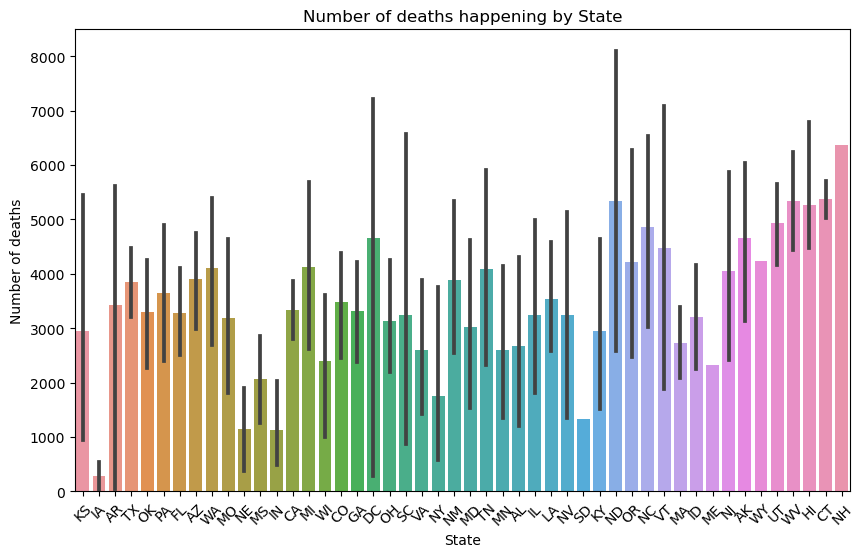

In [ ]:
#Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot( x= "state", y="id", data= unarmed )
plt.title("Number of deaths happening by State")
plt.xlabel("State")
plt.ylabel("Number of deaths")
plt.xticks(rotation=45)
plt.show()

#For the most common state, how many unarmed individuals were the poeple fleeing or not, and what is gender


In [ ]:
shootings['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'shovel',
       'vehicle', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'undetermined', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'BB gun', 'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'railroad spikes',
       'stapler', 'beer bottle', 'unknown weapon', 'binoculars',
       'pellet gun', 'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'pair of scissors', 'pole', 'pick-axe', 'flashlight', 'baton',
       'spear', 'chair', 'pitchfork', 'hatchet and gun', 'rock',
       'piece of wood', 'pipe', 'glass shard', 'motorcycle',
       'pepper spray', 'metal rake', 'c

In [ ]:
shootings['manner_of_death'].unique()

array(['shot', 'shot and Tasered'], dtype=object)

How many people were posing a big thread as compared to those who did not pose a big threat

In [ ]:
#filter those with undertermined threat level



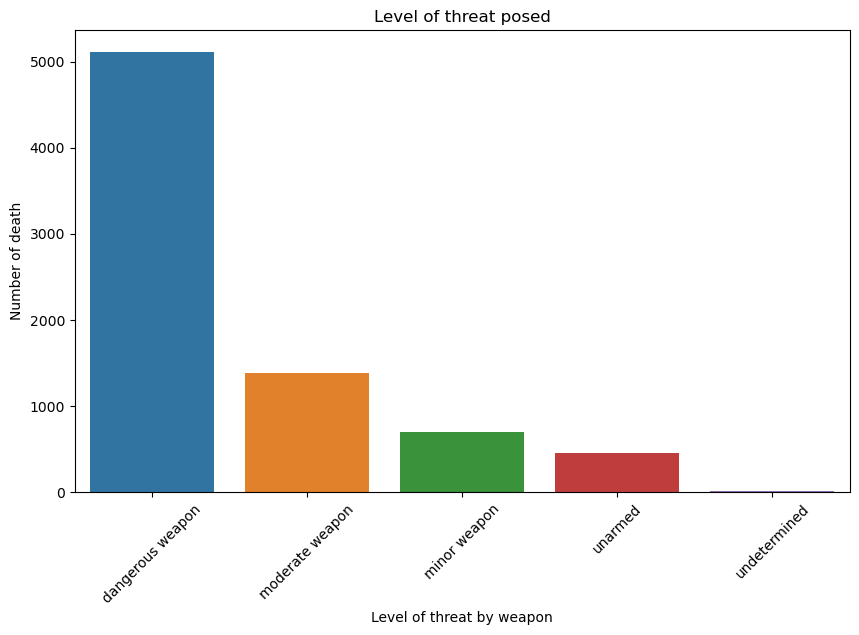

In [ ]:
weapon = shootings.groupby(by = 'weapon_level')['id'].count().reset_index()
weapon.sort_values( by = 'id', ascending= False, inplace= True)

#Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot( x= "weapon_level", y="id", data= weapon )
plt.title("Level of threat posed")
plt.xlabel("Level of threat by weapon")
plt.ylabel("Number of death")
plt.xticks(rotation=45)
plt.show()

In [20]:
shootings['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'shovel',
       'vehicle', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'undetermined', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'BB gun', 'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'railroad spikes',
       'stapler', 'beer bottle', 'unknown weapon', 'binoculars',
       'pellet gun', 'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'pair of scissors', 'pole', 'pick-axe', 'flashlight', 'spear',
       'chair', 'pitchfork', 'hatchet and gun', 'rock', 'piece of wood',
       'pipe', 'glass shard', 'motorcycle', 'pepper spray', 'metal rake',
       'baton', 'c

In [22]:
guns = shootings[(shootings['armed'] == 'gun') | 
                 (shootings['armed'] == 'gun and knife') | 
                 (shootings['armed'] == 'guns and explosives')]
guns

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,body_camera,longitude,latitude,is_geocoding_exact,year,month,day,day_of_week,weekdays,weapon_level
0,3,Tim Elliot,2015-01-02,shot,gun,53,M,Asian,Shelton,WA,...,False,-123.122,47.247,True,2015,January,2,Friday,Friday,dangerous weapon
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,White,Aloha,OR,...,False,-122.892,45.487,True,2015,January,2,Friday,Friday,dangerous weapon
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18,M,White,Guthrie,OK,...,False,-97.423,35.877,True,2015,January,4,Sunday,Sunday,dangerous weapon
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22,M,Hispanic or Latino,Chandler,AZ,...,False,-111.841,33.328,True,2015,January,5,Monday,Monday,dangerous weapon
7,15,Brock Nichols,2015-01-06,shot,gun,35,M,White,Assaria,KS,...,False,-97.564,38.704,True,2015,January,6,Tuesday,Tuesday,dangerous weapon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6825,8318,Bryan Richardson,2022-08-06,shot,gun,28,M,unknown,Orlando,FL,...,False,-81.402,28.452,True,2022,August,6,Saturday,Saturday,dangerous weapon
6826,8319,Douglas Stanton,2022-08-06,shot,gun,59,M,unknown,Rouseville,PA,...,False,-79.692,41.474,True,2022,August,6,Saturday,Saturday,dangerous weapon
6829,8315,Javier Alanis,2022-08-08,shot,gun,31,M,unknown,Harris County,TX,...,False,-95.310,29.775,True,2022,August,8,Monday,Monday,dangerous weapon
6830,8326,William Chad Newman,2022-08-08,shot,gun,40,M,unknown,Lawrence County,AR,...,False,-91.073,36.084,True,2022,August,8,Monday,Monday,dangerous weapon


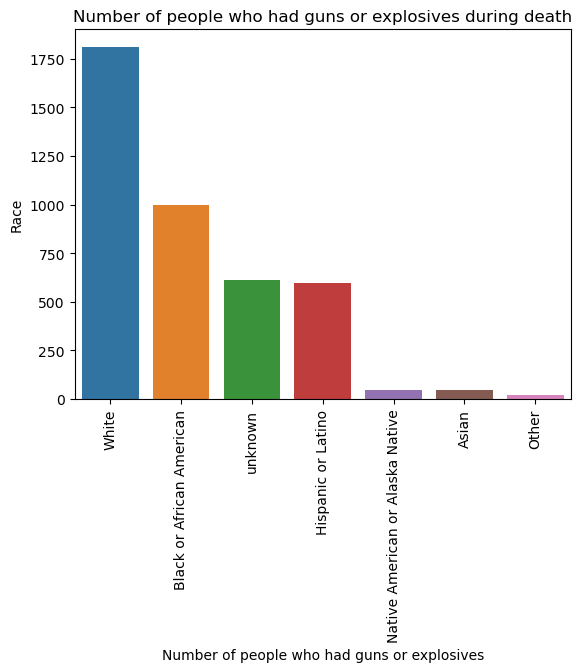

In [30]:
guns_race = guns.groupby( by = ['race'])['id'].count().reset_index()
guns_race.sort_values( by = 'id', ascending = False, inplace = True)


sns.barplot( x = 'race', y = 'id' , data = guns_race)
plt.title('Number of people who had guns or explosives during death')
plt.ylabel('Race')
plt.xlabel('Number of people who had guns or explosives')
plt.xticks(rotation = 90)

plt.show()

In [ ]:
shootings['threat_level'].unique()

array(['attack', 'other', 'undetermined'], dtype=object)